In [1]:
import re

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# 🐼 Exploratory Analysis - Coding Challenge
---

#### Read in the ratings and movies tables

- Download the data from https://grouplens.org/datasets/movielens/
- Take the **small** dataset: `ml-latest-small.zip`
- Extract the tables from the `.zip` archive

- ⭐ Advanced Challenge: Try out to process the larger datasets



In [3]:
ratings = pd.read_csv('data/ratings.csv')
movies = pd.read_csv('data/movies.csv')

In [4]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [5]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [13]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


---
## Ratings table

#### How many unique users and movies are in the dataset?

In [6]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [11]:
len(ratings['userId'].unique())

610

In [12]:
len(ratings['movieId'].unique())

9724

#### What is the average rating

In [14]:
ratings['rating'].mean()

3.501556983616962

#### which rating appears the most?

In [20]:
rating_counts = ratings['rating'].value_counts()
rating_counts

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [25]:
max = rating_counts.max()
rating_counts[rating_counts == max]

4.0    26818
Name: rating, dtype: int64

#### What is the percentage of 5 star ratings?

- ⭐**Bonus**: How are the ratings distributed? Derive a relative frequency table for the `rating` column!

In [32]:
fivestar_percent = (rating_counts[5] / rating_counts.sum()) * 100
fivestar_percent

13.101471696616288

---
#### Count the number of ratings *per* user

- Hint: Use a `groupby` statement and the `count` method

In [33]:
g = ratings.groupby("userId")

In [127]:
pd.DataFrame(g.groups)

ValueError: All arrays must be of the same length

In [36]:
user_table = g.count()
user_table

,movieId,rating,timestamp
userId,,,
1,232,232,232
2,29,29,29
3,39,39,39
4,216,216,216
5,44,44,44
...,...,...,...
606,1115,1115,1115
607,187,187,187
608,831,831,831


- How many users have rated more than 20 movies?

In [38]:
user_table['movieId'][user_table['movieId'] > 20].count()

596

- How many movies rated the user with the most/ least ratings?

In [45]:
g['rating'] == 5

False

In [123]:
for name, group in g:
    print(name)
    print('\n')
    print(group)



1


     userId  movieId  rating  timestamp
0         1        1     4.0  964982703
1         1        3     4.0  964981247
2         1        6     4.0  964982224
3         1       47     5.0  964983815
4         1       50     5.0  964982931
..      ...      ...     ...        ...
227       1     3744     4.0  964980694
228       1     3793     5.0  964981855
229       1     3809     4.0  964981220
230       1     4006     4.0  964982903
231       1     5060     5.0  964984002

[232 rows x 4 columns]
2


     userId  movieId  rating   timestamp
232       2      318     3.0  1445714835
233       2      333     4.0  1445715029
234       2     1704     4.5  1445715228
235       2     3578     4.0  1445714885
236       2     6874     4.0  1445714952
237       2     8798     3.5  1445714960
238       2    46970     4.0  1445715013
239       2    48516     4.0  1445715064
240       2    58559     4.5  1445715141
241       2    60756     5.0  1445714980
242       2    68157     4.5  1445715

In [50]:
user_max = []
user_min = []
for name, group in g:
    user_max.append(group['movieId'][group['rating'] == 5].count())
    user_min.append(group['movieId'][group['rating'] == 1].count())b

user_table['Nr_Max_ratings'] = user_max
user_table['Nr_Min_ratings'] = user_min
user_table


,movieId,rating,timestamp,Nr_Max_ratings,Nr_Min_ratings
userId,,,,,
1,232,232,232,124,1
2,29,29,29,6,0
3,39,39,39,10,0
4,216,216,216,64,23
5,44,44,44,10,1
...,...,...,...,...,...
606,1115,1115,1115,33,6
607,187,187,187,52,3
608,831,831,831,23,29


In [53]:
user_table.reset_index(inplace=True)

-  What is the *median* number of ratings?

In [51]:
user_table['rating'].median()

70.5

- Draw a histogram or density plot of the distribution of the number of ratings per user! 

    - How would you characterize the distribution?
    - Hint: `sns.histplot()`

In [54]:
user_table

,userId,movieId,rating,timestamp,Nr_Max_ratings,Nr_Min_ratings
0,1,232,232,232,124,1
1,2,29,29,29,6,0
2,3,39,39,39,10,0
3,4,216,216,216,64,23
4,5,44,44,44,10,1
...,...,...,...,...,...,...
605,606,1115,1115,1115,33,6
606,607,187,187,187,52,3
607,608,831,831,831,23,29
608,609,37,37,37,0,0


<AxesSubplot:xlabel='userId', ylabel='rating'>

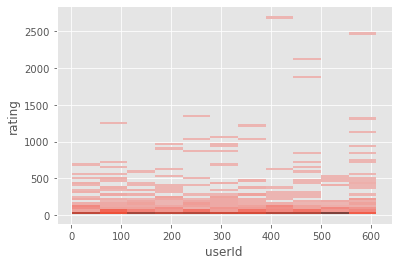

In [55]:
sns.histplot(x=user_table['userId'], y=user_table['rating'])

---
#### Calculate the average rating *per user*

- Hint: use a `groupby` statement, select the `rating` column and apply the `mean` method

In [58]:
rating_ave = g['rating'].mean()
rating_ave

userId
1      4.366379
2      3.948276
3      2.435897
4      3.555556
5      3.636364
         ...   
606    3.657399
607    3.786096
608    3.134176
609    3.270270
610    3.688556
Name: rating, Length: 610, dtype: float64

- Which user gave the worst ratings on average, which user gave the best ratings?

In [66]:
best_rating_user = rating_ave.idxmax()
worst_rating_user = rating_ave.idxmin()
print(f"the user with the  best rating aveerage is:{best_rating_user}")
print(f"the user with the  worst rating aveerage is:{worst_rating_user}")

the user with the  best rating aveerage is:53
the user with the  worst rating aveerage is:442


- ⭐**Bonus**: Use your previous results and filter out users that have rated less than 20 movies! Do your results change?

- Plot the distribution of average ratings! How would you characterize the distribution?

<AxesSubplot:xlabel='rating', ylabel='Count'>

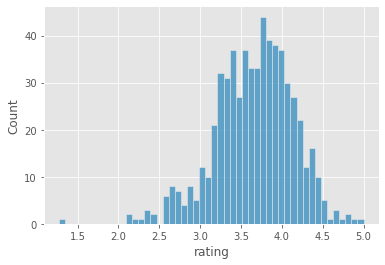

In [69]:
sns.histplot(x=rating_ave, bins=50)

- ⭐**Bonus**: Are users who have given more ratings also stricter in their ratings?

    - Derive the correlation between the average rating and the number of ratings per user!
    - Draw a scatterplot of the user averages and number of ratings
    - Only consider users that have rated at least 10 movies

In [71]:
user_table[user_table['userId'] == 139]

,userId,movieId,rating,timestamp,Nr_Max_ratings,Nr_Min_ratings
138,139,194,194,194,0,19


In [72]:
user_table[user_table['userId'] == 452]

,userId,movieId,rating,timestamp,Nr_Max_ratings,Nr_Min_ratings
451,452,202,202,202,122,0


In [73]:
rating_ave[139]

2.1443298969072164

In [74]:
rating_ave[452]

4.556930693069307

--- 
## Movies table

#### Are there any duplicated titles?

Hint: use the `duplicated` method

In [75]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [89]:
movies[movies['title'].duplicated() == True]

,movieId,title,genres
5601,26958,Emma (1996),Romance
6932,64997,War of the Worlds (2005),Action|Sci-Fi
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
9135,147002,Eros (2004),Drama|Romance
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller


In [129]:
movies[movies['title']=='Emma (1996)']

,movieId,title,genres
650,838,Emma (1996),Comedy|Drama|Romance
5601,26958,Emma (1996),Romance


In [ ]:
movies['title'].duplicated(keep==Ture)

#### Are there any `movieId`s listed in the movies table that are not in the `ratings` table?

- Hint: Use the `isin()` method

In [94]:
movies_no_ratings = movies[movies['movieId'].isin(ratings['movieId'])==False]
movies_no_ratings

,movieId,title,genres
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller
2211,2939,Niagara (1953),Drama|Thriller
2499,3338,For All Mankind (1989),Documentary
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War
4037,5721,"Chosen, The (1981)",Drama
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance
4598,6849,Scrooge (1970),Drama|Fantasy|Musical
4704,7020,Proof (1991),Comedy|Drama|Romance
5020,7792,"Parallax View, The (1974)",Thriller


In [96]:
movies_no_ratings['movieId'].count()

18

#### ⭐ Bonus: Extract the year out of the title column

- Use the `pandas.Series.str.extract()` method with a regular expression
- Hint: check out the [following regular expression](https://regex101.com/r/dJkxR0/1)

#### ⭐ Bonus: Split the genre column into a separate genre table

1. Use the `pandas.Series.str.split` method
2. Then use the `pandas.Series.explode` method to clean up the list entries
3. Which `movieId` has the most genres assigned?

---
## Fuzzy String Search

#### Search for "star wars" movies in the items table

- install the library [thefuzz](https://github.com/seatgeek/thefuzz)
- search for the query "star wars" in the list of movie titles
    - set the `movieId` as index for the dataframe
    - extract the `titles` column and use it as input to `extractBests()`
- look at the following code snippet and research:
    - what is the third entry in the tuples returned?
    - what is the second entry in the tuples returned?

In [111]:
from thefuzz import fuzz, process

things = {"B": "banana", 2: "bananabred", "bb": "beans", "K": "kiwis", "A": "apples"}
search_query = "bananaa"
match = process.extractBests(
    search_query, things, scorer=fuzz.token_set_ratio
)
match

/home/damoon/anaconda3/lib/python3.9/site-packages/thefuzz/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


[('banana', 92, 'B'),
 ('bananabred', 71, 2),
 ('beans', 50, 'bb'),
 ('apples', 15, 'A'),
 ('kiwis', 0, 'K')]

In [132]:
movies_ids = movies.set_index('movieId')

In [133]:
from thefuzz import fuzz, process

things = movies_ids['title']
search_query = "star wars"
match = process.extractBests(
    search_query, things, scorer=fuzz.token_set_ratio
)
match

[('Star Wars: Episode IV - A New Hope (1977)', 100, 260),
 ('Star Wars: Episode V - The Empire Strikes Back (1980)', 100, 1196),
 ('Star Wars: Episode VI - Return of the Jedi (1983)', 100, 1210),
 ('Star Wars: Episode I - The Phantom Menace (1999)', 100, 2628),
 ('Star Wars: Episode II - Attack of the Clones (2002)', 100, 5378)]

---
## Ratings and movies table

#### Merge/join the ratings and movies tables together

- use the `movieId` as common key
- hint: `df.merge(...)`

In [4]:
df_merge_inner = pd.merge(movies, ratings, on='movieId', how="inner")
df_merge_inner

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [137]:
df_merge_outer = pd.merge(movies, ratings, on='movieId', how="outer")
df_merge_outer

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09
...,...,...,...,...,...,...
100849,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184.0,4.0,1.537109e+09
100850,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184.0,3.5,1.537110e+09
100851,193585,Flint (2017),Drama,184.0,3.5,1.537110e+09
100852,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184.0,3.5,1.537110e+09


---
#### Count the number of ratings per movie title!

In [5]:
title_table = df_merge_inner.groupby(["title"]).count()
title_table

,movieId,genres,userId,rating,timestamp
title,,,,,
'71 (2014),1,1,1,1,1
'Hellboy': The Seeds of Creation (2004),1,1,1,1,1
'Round Midnight (1986),2,2,2,2,2
'Salem's Lot (2004),1,1,1,1,1
'Til There Was You (1997),2,2,2,2,2
...,...,...,...,...,...
eXistenZ (1999),22,22,22,22,22
xXx (2002),24,24,24,24,24
xXx: State of the Union (2005),5,5,5,5,5


- What are the top 10 most rated movies in the dataset?

In [6]:
title_table.sort_values(by="rating", ascending=False, inplace=True)
title_table

,movieId,genres,userId,rating,timestamp
title,,,,,
Forrest Gump (1994),329,329,329,329,329
"Shawshank Redemption, The (1994)",317,317,317,317,317
Pulp Fiction (1994),307,307,307,307,307
"Silence of the Lambs, The (1991)",279,279,279,279,279
"Matrix, The (1999)",278,278,278,278,278
...,...,...,...,...,...
King Solomon's Mines (1950),1,1,1,1,1
King Solomon's Mines (1937),1,1,1,1,1
King Ralph (1991),1,1,1,1,1


In [7]:
title_table['rating'][0:9]

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Name: rating, dtype: int64

--- 
##### Which movies are most polarizing?

- For each movie, calculate the standard deviation divided by the average rating (This is called the [coefficient of variation](https://datacollection.jrc.ec.europa.eu/wordef/coefficient-of-variation))
- Look at the top 10 movies that have the highest coefficient of variation!


In [39]:
gg = df_merge_inner.groupby(["title"])

In [51]:
std_col = gg['rating'].std()
std_col.fillna(0, inplace=True)


In [60]:
std_col

title
'71 (2014)                                   0.000000
'Hellboy': The Seeds of Creation (2004)      0.000000
'Round Midnight (1986)                       0.000000
'Salem's Lot (2004)                          0.000000
'Til There Was You (1997)                    1.414214
                                               ...   
eXistenZ (1999)                              0.804479
xXx (2002)                                   0.966607
xXx: State of the Union (2005)               0.500000
¡Three Amigos! (1986)                        0.944009
À nous la liberté (Freedom for Us) (1931)    0.000000
Name: rating, Length: 9719, dtype: float64

In [54]:
mean_col = gg['rating'].mean()

In [55]:
cov_col = std_col/mean_col
cov_col

title
'71 (2014)                                   0.000000
'Hellboy': The Seeds of Creation (2004)      0.000000
'Round Midnight (1986)                       0.000000
'Salem's Lot (2004)                          0.000000
'Til There Was You (1997)                    0.353553
                                               ...   
eXistenZ (1999)                              0.208218
xXx (2002)                                   0.348851
xXx: State of the Union (2005)               0.250000
¡Three Amigos! (1986)                        0.301156
À nous la liberté (Freedom for Us) (1931)    0.000000
Name: rating, Length: 9719, dtype: float64

In [61]:
cov_col.sort_values(ascending=False)[0:9]

title
Ivan's Childhood (a.k.a. My Name is Ivan) (Ivanovo detstvo) (1962)    1.157084
Fanny and Alexander (Fanny och Alexander) (1982)                      1.157084
Kwaidan (Kaidan) (1964)                                               1.131371
Emma (2009)                                                           1.131371
Garfield: A Tail of Two Kitties (2006)                                1.099944
Tenebre (1982)                                                        1.099944
I, Frankenstein (2014)                                                1.099944
Wolfman, The (2010)                                                   1.099944
Serbian Film, A (Srpski film) (2010)                                  1.099944
Name: rating, dtype: float64

---

#### Calculate the average rating per movie title!

In [62]:
gg['rating'].mean()

title
'71 (2014)                                   4.000000
'Hellboy': The Seeds of Creation (2004)      4.000000
'Round Midnight (1986)                       3.500000
'Salem's Lot (2004)                          5.000000
'Til There Was You (1997)                    4.000000
                                               ...   
eXistenZ (1999)                              3.863636
xXx (2002)                                   2.770833
xXx: State of the Union (2005)               2.000000
¡Three Amigos! (1986)                        3.134615
À nous la liberté (Freedom for Us) (1931)    1.000000
Name: rating, Length: 9719, dtype: float64

- Make a visualization of the distribution of average ratings per movie

<AxesSubplot:xlabel='rating', ylabel='Count'>

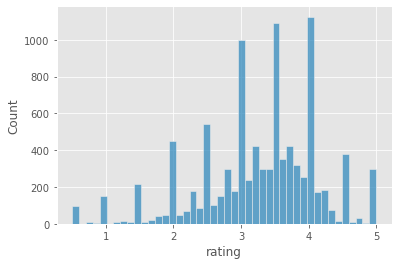

In [63]:
sns.histplot(x=mean_col)

- Which movie was rated the best? Which movie was rated the worst?
    - ⭐**Bonus**: Filter out movies that have been rated by less than 30 users. Do your results change? Why?

In [65]:
print(f"the movie {mean_col.idxmax()} was rated the best")
print(f"the movie {mean_col.idxmin()} was rated the worst")


the movie 'Salem's Lot (2004) was rated the best
the movie 3 Ninjas Knuckle Up (1995) was rated the worst


- ⭐**Bonus**: Did the average rating of movies improve over time? 

    - Use the `year` that you have extracted in a previous ⭐bonus exercises
    - Visualize your findings in a nice plot
    - Post your plot in slack!